<a href="https://colab.research.google.com/github/huseyin-yigit-ulker/Machine_learning_assignments/blob/main/ass1/AIN313_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIN313 - Machine Learning Lab.

**Assignment 1**

**Diesase Detection on X-Ray Images**

**Instructor: **Erkut Erdem

**TA:** Sibel Kapan


# Information

## Student Information

Please fill the informations!

Name Surname: Hüseyin Yiğit Ülker

Student ID: 21993092

# Theoretical Questions for k-Nearest Neighbor Classification

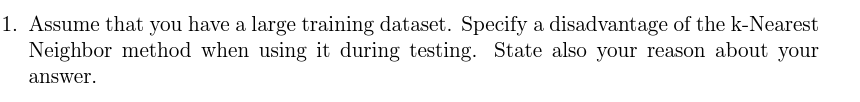

While the Knn algorithm is being trained, the selected point from the training set calculates the distance between all the other points in the training set. The more data in our training set, the higher the cost of this operation and the lower the performance of the Knn algorithm.

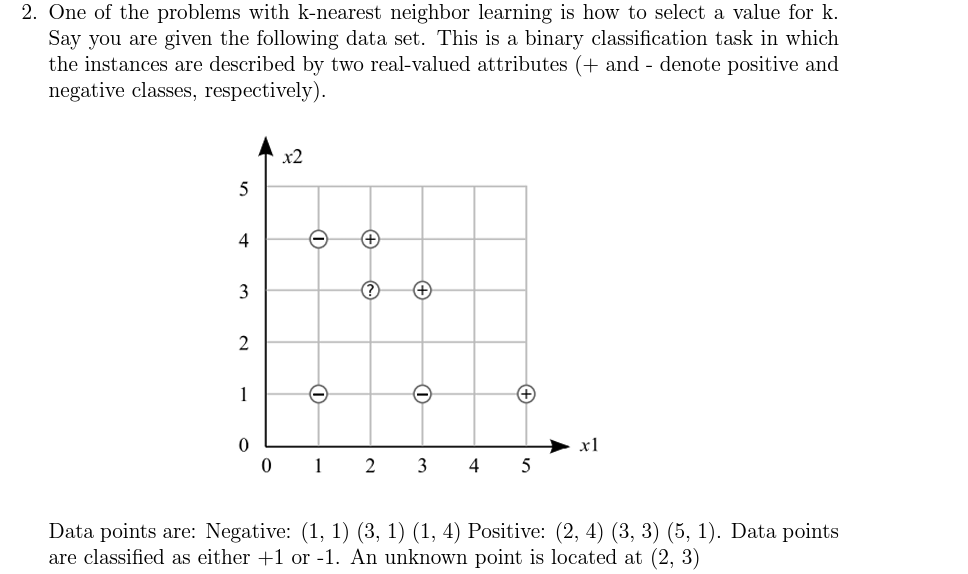

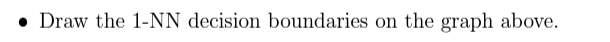

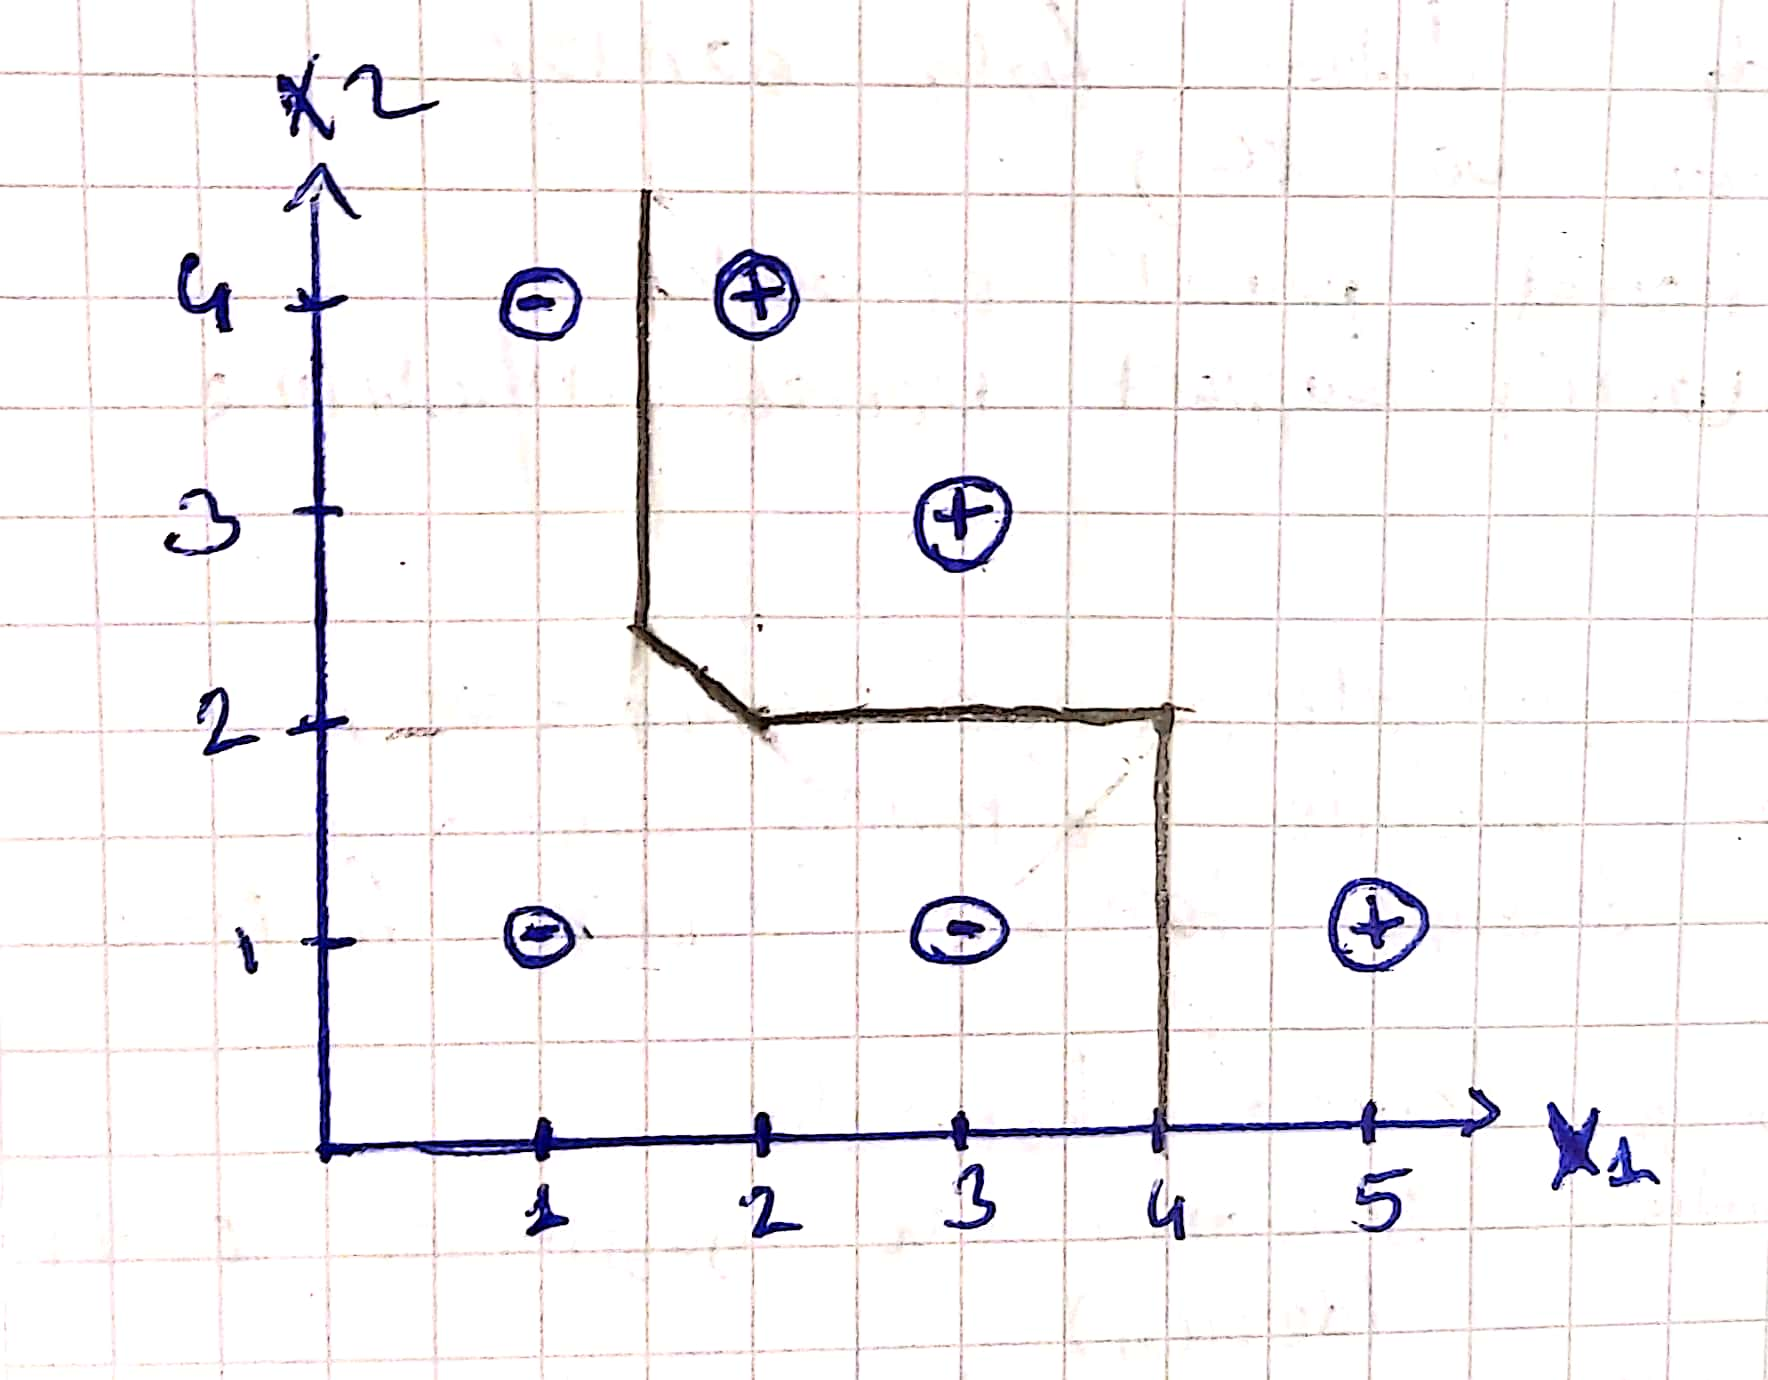

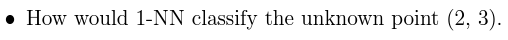

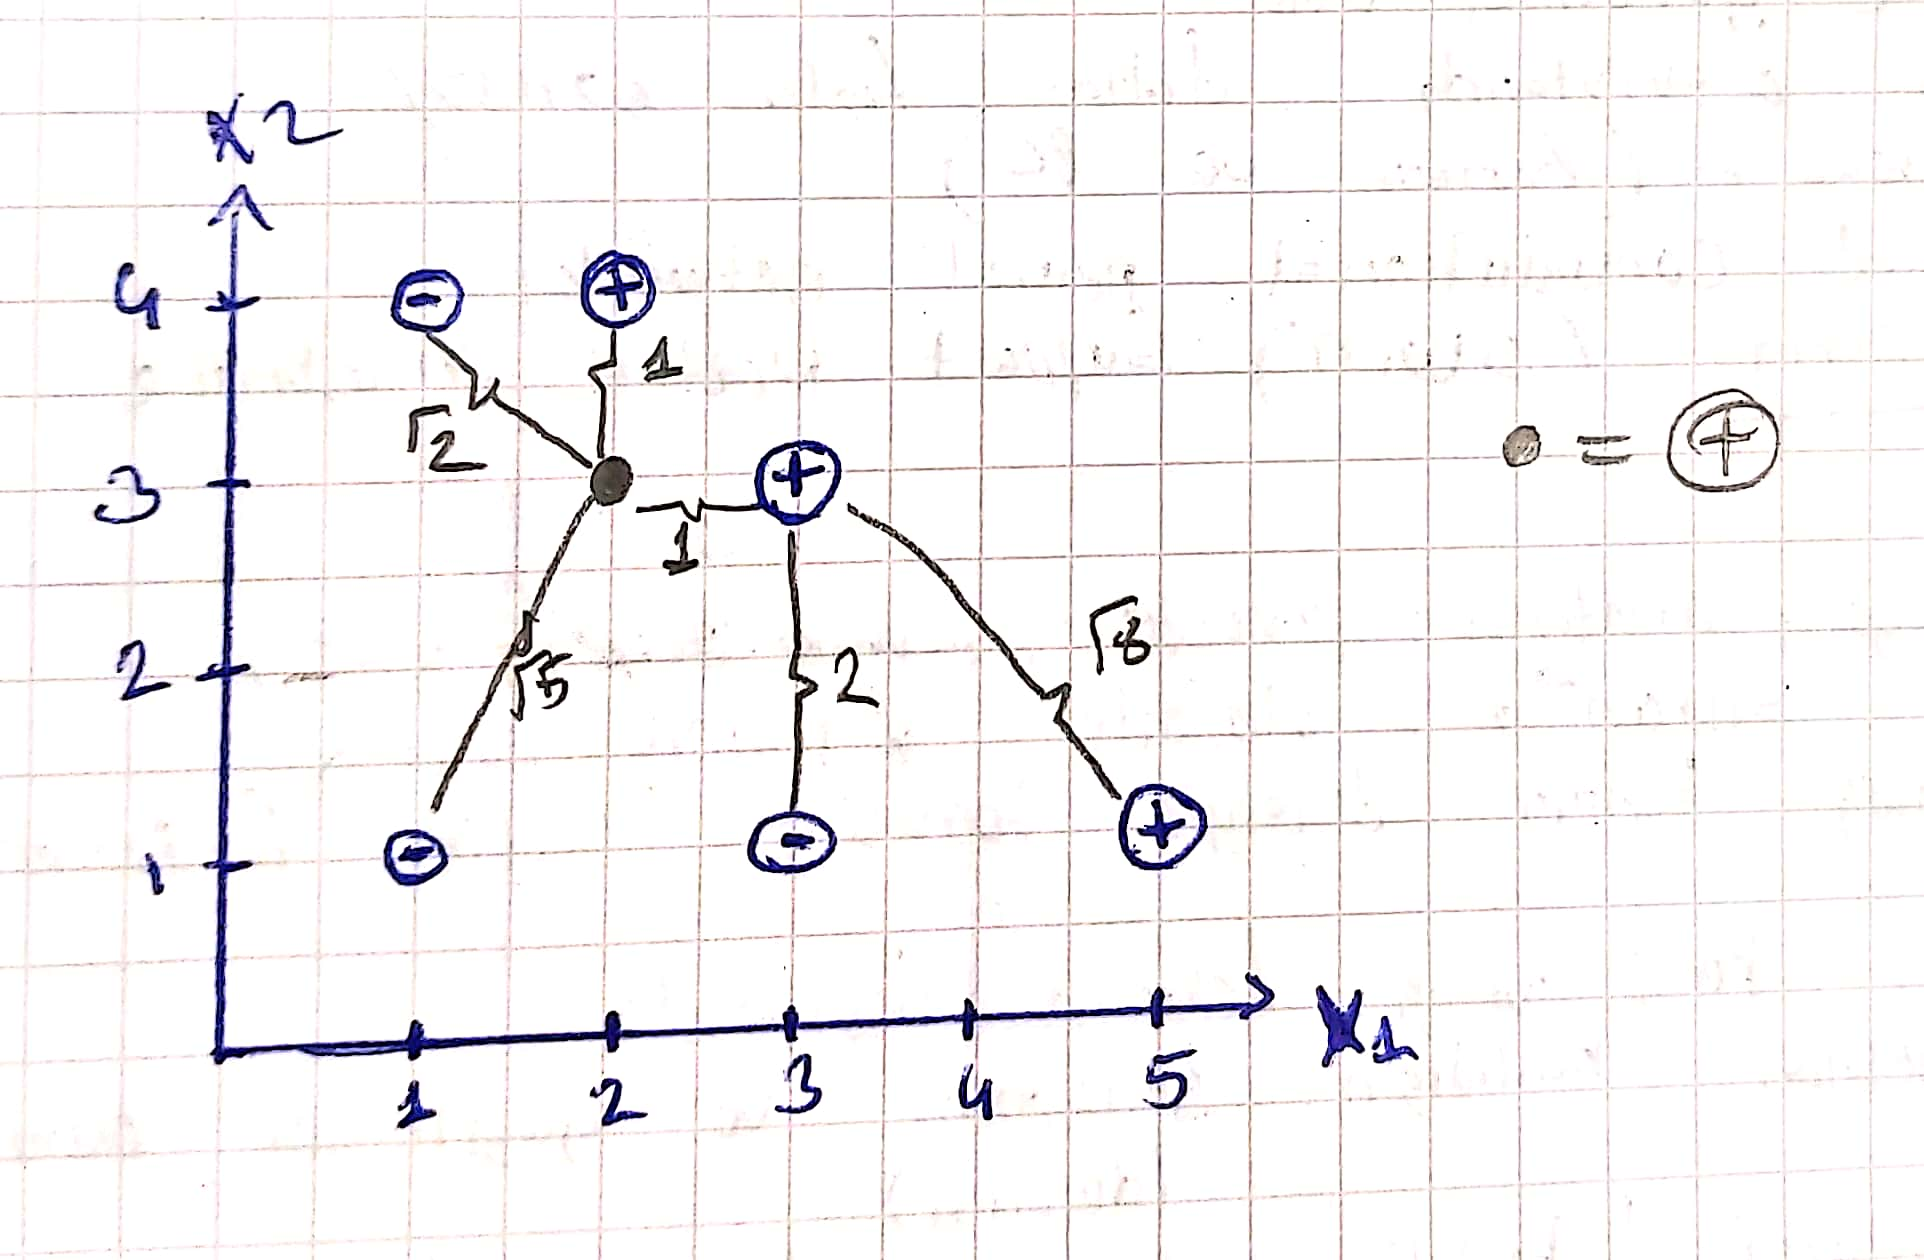
Since the nearest neighbor for the point (2,3) is +, it is + marked at this point.

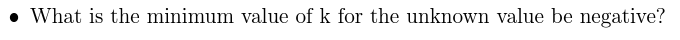

k=5
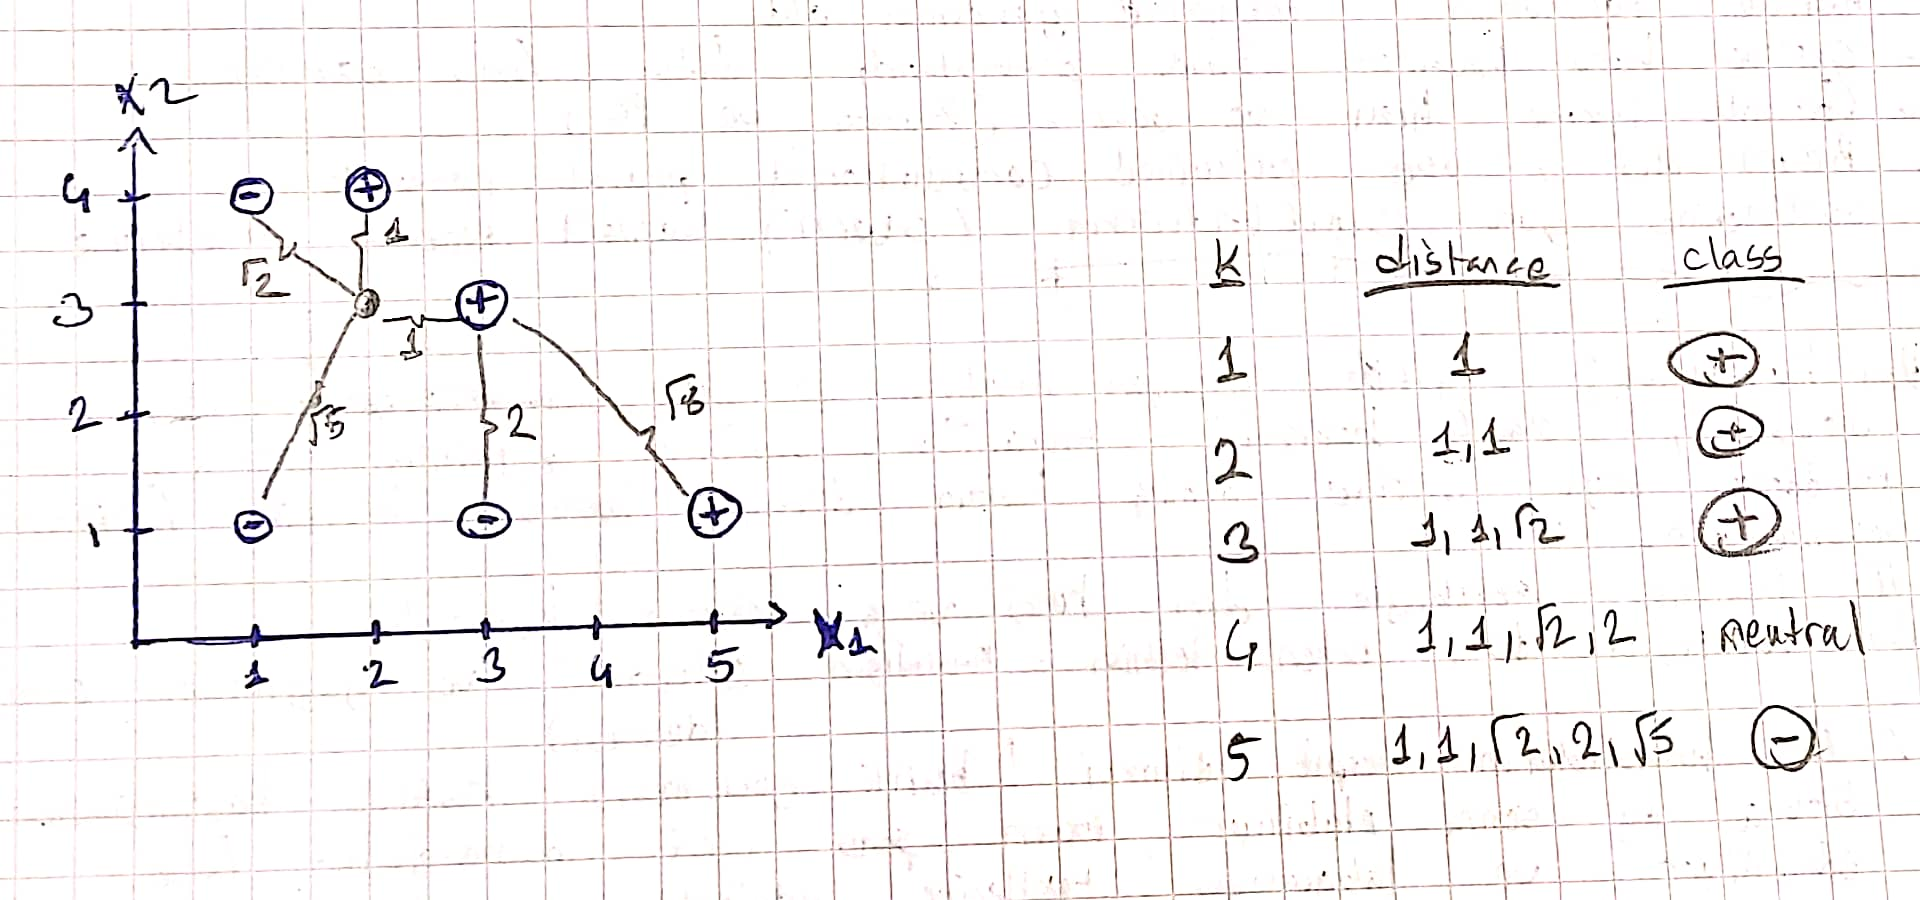

knn6.png

The k value in the Knn algorithm represents the nearest neighbors to be calculated. The K value will directly affect the result. If k is 1, the probability of overfit will be very high. If it is too large, it will give very general results. For these reasons, the correct determination of the k value is important for the Knn algorithm.

# Theoretical Questions for Linear Regression

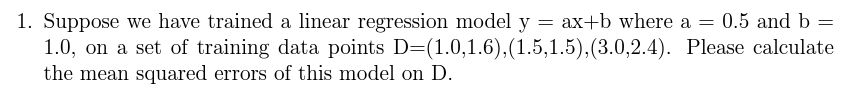

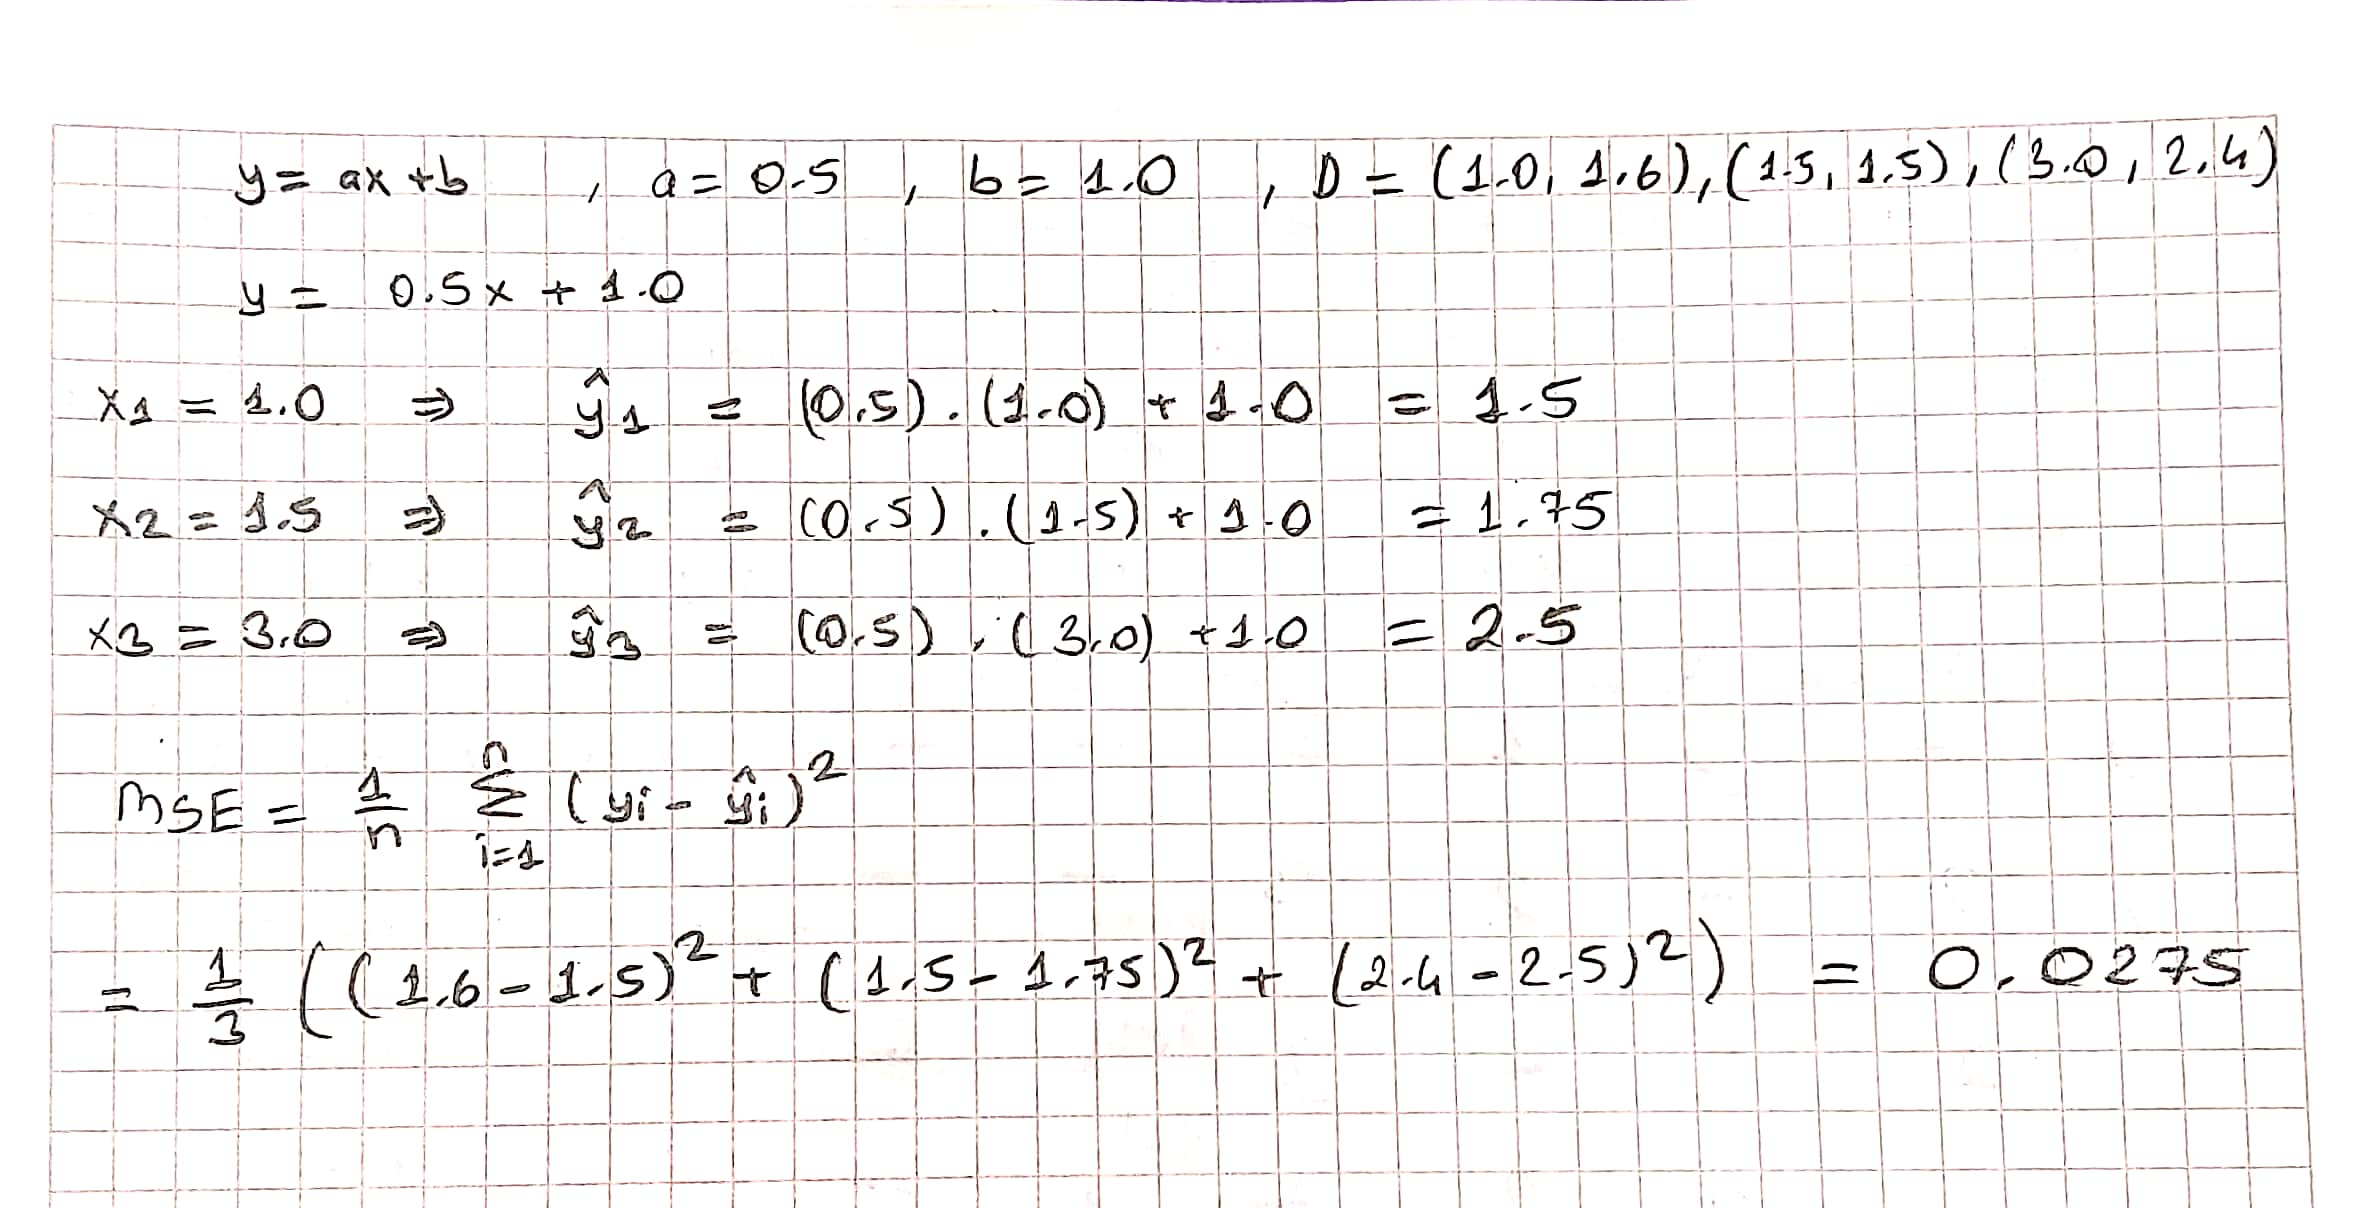

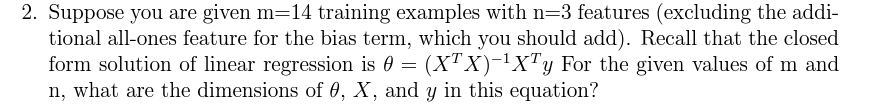

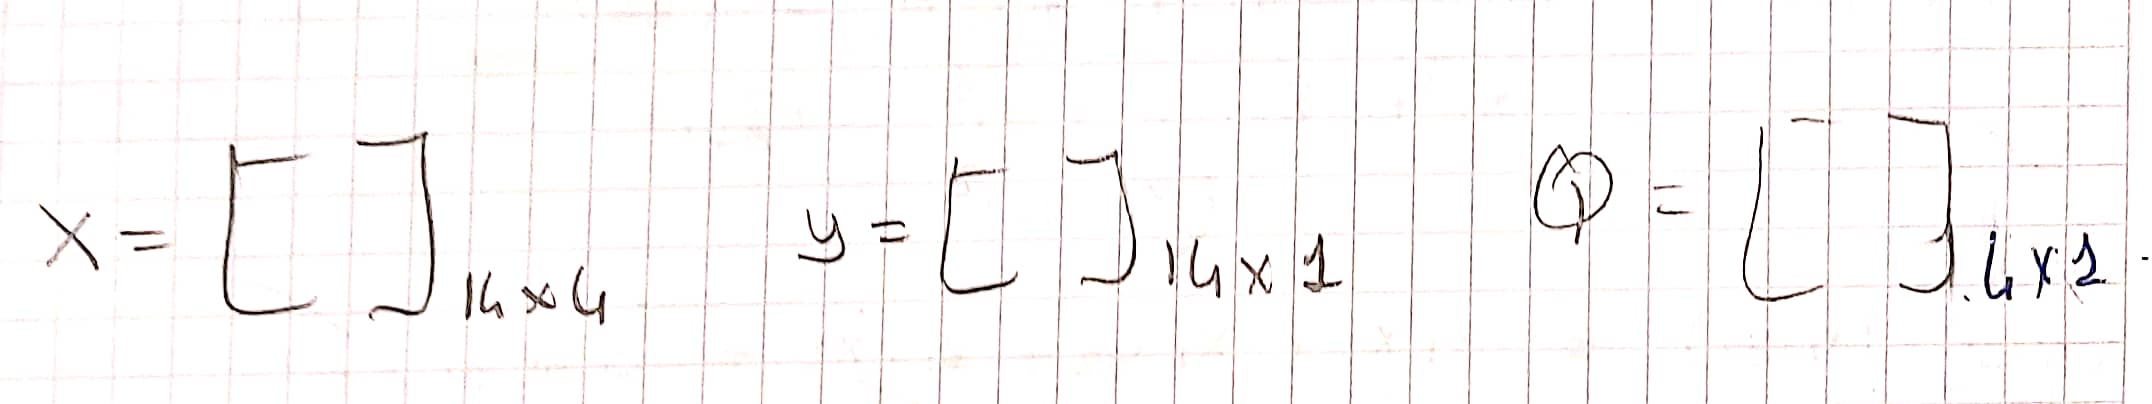

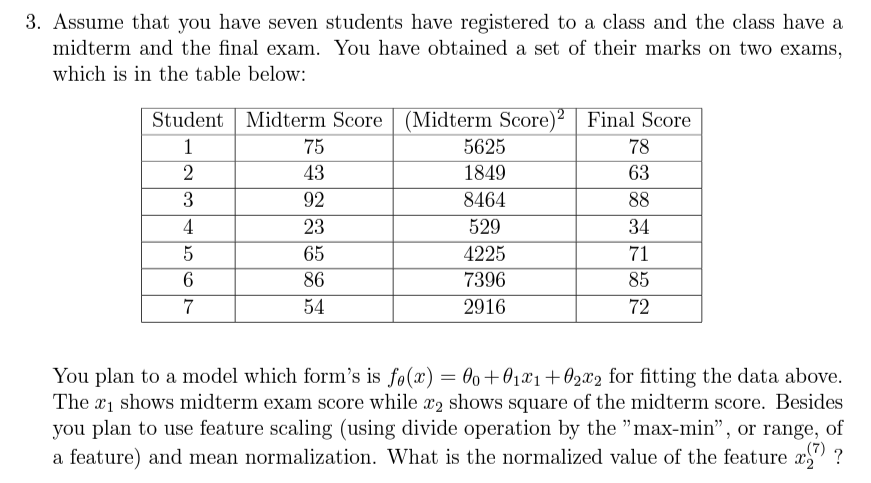

-0.19
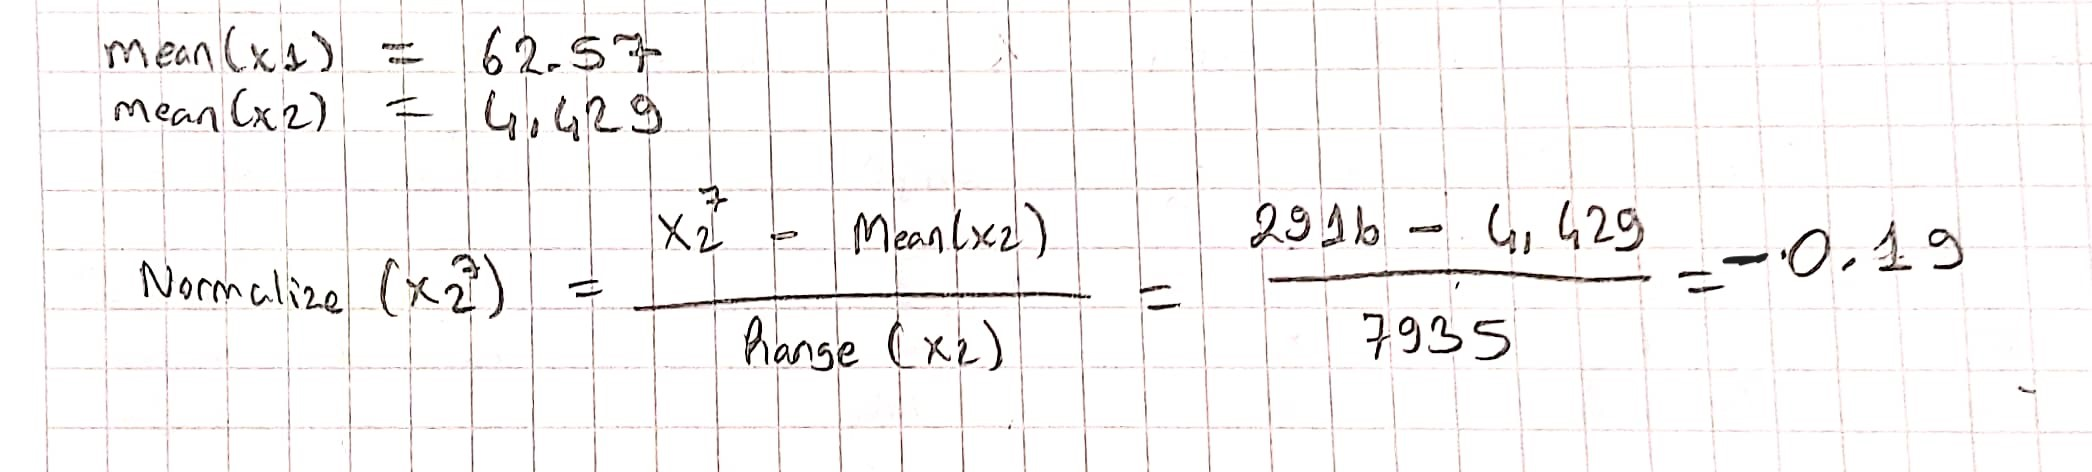

# CODE

In [ ]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow as show
import os
from google.colab import drive
import numpy as np
from multiprocessing.pool import ThreadPool
drive.mount('/content/gdrive/', force_remount=True) 

Mounted at /content/gdrive/


##CANNY

In [ ]:
# Reading the data set in the drive for canny filter
from time import process_time
def read_image_canny(disease_name,test_or_train):
  path="/content/gdrive/My Drive/Colab Notebooks/chest_xray/"+test_or_train
  loc = os.listdir(path+"/"+disease_name)
  data=[]
  for i in range(1,len(loc)+1):
    img_r = cv.imread(path+"/"+disease_name+"/"+disease_name+"-"+str(i)+".jpg")
    reimg_r = cv.resize(img_r,(32,32))
    gray_img=cv.cvtColor(reimg_r,cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray_img,80,250)
    result=edges.ravel()
    data.append(result)
  return np.array(data)

In [ ]:
pneumonia_test_canny=read_image_canny("pneumonia","test")
covid_test_canny=read_image_canny("covid","test")
normal_test_canny=read_image_canny("normal","test")
pneumonia_train_canny=read_image_canny("pneumonia","train")
covid_train_canny=read_image_canny("covid","train")
normal_train_canny=read_image_canny("normal","train")

In [ ]:
X_train=np.concatenate((pneumonia_train_canny,covid_train_canny,normal_train_canny))
X_test=np.concatenate((pneumonia_test_canny,covid_test_canny,normal_test_canny))
y_train=np.concatenate((np.zeros((len(pneumonia_train_canny),)),np.ones((len(covid_train_canny),)),np.full((len(normal_train_canny),),2)))
y_test=np.concatenate((np.zeros((len(pneumonia_test_canny),)),np.ones((len(covid_test_canny),)),np.full((len(normal_test_canny),),2)))

In [ ]:
X_train = X_train.astype('int32')
X_test=X_test.astype("int32")

In [ ]:
def Knn(X_train,y_train,X_test,k,hyperparameter_distance="L2",knn_type="normal"):
  def weighted_knn(diff,idx):
    distances=[1/diff[d] for d in idx[:k] if diff[d]!=0]
    sum_dist=np.sum(distances)
    distances/=sum_dist
    nearest_classes=y_train[idx[:k]]
    nearest_classes=nearest_classes.astype("int16")
    result=np.zeros(max(nearest_classes)+1,dtype=np.float32)
    for c in range(len(nearest_classes)):
      result[nearest_classes[c]]+=distances[c]
    return result.argmax()
  pred=[]
  distance=lambda m,n:np.sqrt(np.sum(np.square(m-n)))
  if (hyperparameter_distance=="L1"):
    distance=lambda m,n:np.sum(abs(m-n))
  for i in X_test:
    diff=[]
    for j in X_train:
      result=distance(i,j)
      diff.append(result)
    idx = np.argpartition(diff,k-1)[:k] 
    if(knn_type=="weighted"):
      a=weighted_knn(diff,idx)
      pred.append(a)
    elif(knn_type=="normal"):
      nearest_classes=y_train[idx]
      nearest_classes=nearest_classes.astype("int16")
      pred.append(np.bincount(nearest_classes).argmax())
  return pred


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix 

In [ ]:
# Calculating the precision_score, recall_score, f1_score, accuracy_score values ​​of the model by changing the parameters of the model and saving the results
all_data=[]
for a in ["L1","L2"]:
  for m in ["normal","weighted"]:
    for b in range(2,53,10):
      predict=Knn(X_train,y_train,X_test,b,a,m)
      accuracy=accuracy_score(y_test,predict)
      print(a,m,b,accuracy,end="  ")
      recall=recall_score(y_test,predict,average="weighted")
      print(recall,end="  ")
      precision=precision_score(y_test,predict,average="weighted")
      print(precision,end="  ")
      f1=f1_score(y_test,predict,average="weighted")
      print(f1)
      all_data.append([a,m,b,accuracy,recall,precision,f1])     

L1 normal 2 0.4533333333333333  0.4533333333333333  0.6203085424821552  0.3960980390162189
L1 normal 12 0.39  0.39  0.5767400527462446  0.2785613012098398
L1 normal 22 0.4066666666666667  0.4066666666666667  0.6224537489945433  0.30776931368753463
L1 normal 32 0.42  0.42  0.5934846806939831  0.3299514644385638
L1 normal 42 0.44333333333333336  0.44333333333333336  0.6302148302148303  0.36346243167507947
L1 normal 52 0.45666666666666667  0.45666666666666667  0.6290830381739473  0.3820662768031189
L1 weighted 2 0.48333333333333334  0.48333333333333334  0.6228521219175425  0.4350207342679839
L1 weighted 12 0.39666666666666667  0.39666666666666667  0.5947712418300654  0.29066467150449354
L1 weighted 22 0.4066666666666667  0.4066666666666667  0.6325250395361096  0.3078918241735046
L1 weighted 32 0.41333333333333333  0.41333333333333333  0.5893689749203058  0.319458958142299
L1 weighted 42 0.4266666666666667  0.4266666666666667  0.6099436517783292  0.33948731416675587
L1 weighted 52 0.446666

In [ ]:
# Converting results to dataframe
import pandas as pd
columns_name=["DistanceMetric","KernelOfKnn","NearestNeighbourNumber","Accuracy","Recall","Precision","F1_Score"]
df=pd.DataFrame(all_data,columns=columns_name)
df.iloc[:,3:]=round(df.iloc[:,3:],2)
df

DistanceMetric KernelOfKnn  NearestNeighbourNumber  Accuracy  Recall  \
0              L1      normal                       5      0.41    0.41   
1              L1      normal                      15      0.38    0.38   
2              L1      normal                      35      0.42    0.42   
3              L1    weighted                       5      0.41    0.41   
4              L1    weighted                      15      0.39    0.39   
5              L1    weighted                      35      0.42    0.42   
6              L2      normal                       5      0.41    0.41   
7              L2      normal                      15      0.38    0.38   
8              L2      normal                      35      0.42    0.42   
9              L2    weighted                       5      0.41    0.41   
10             L2    weighted                      15      0.39    0.39   
11             L2    weighted                      35      0.42    0.42   

    Precision  F1_Score  
0        0.58      0.31  
1        0.57      0.27  
2        0.59      0.32  
3        0.59      0.31  
4        0.58      0.28  
5        0.61      0.32  
6        0.58      0.31  
7        0.57      0.27  
8        0.59      0.32  
9        0.59      0.31  
10       0.58      0.28  
11       0.61      0.32

In [ ]:
# Save results as csv file
from google.colab import files
df.to_csv('Canny_ex.csv', encoding = 'utf-8-sig') 
files.download('Canny_ex.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
error=[]
for i in range(1,100,5):
  predict=Knn(X_train,y_train,X_test,i,"L2","normal")
  rmse = np.sqrt(np.square(np.subtract(y_test,predict)).mean())
  error.append(rmse)

Text(0, 0.5, 'RMSE Rate')

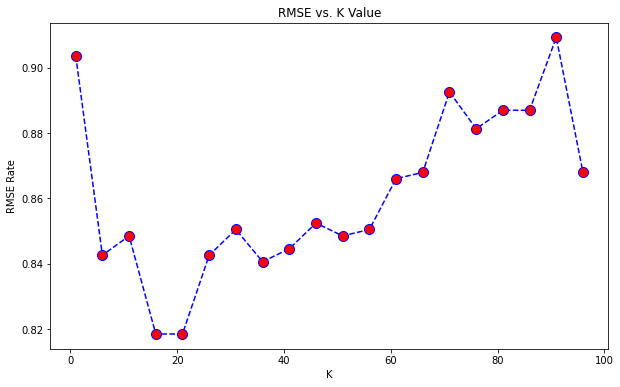

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100,5),error,color=  "blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("RMSE vs. K Value")
plt.xlabel("K")
plt.ylabel("RMSE Rate")

In [ ]:
# Testing the model for minimum RMSE k value = 16
predict=Knn(X_train,y_train,X_test,16,"L2","normal")

In [ ]:
accuracy=accuracy_score(y_test,predict)
print("accuracy = ",accuracy)
recall=recall_score(y_test,predict,average="weighted")
print("recall score = ",recall)
precision=precision_score(y_test,predict,average="weighted")
print("precision = ",precision)
f1=f1_score(y_test,predict,average="weighted")
print("f1_score = ",f1)

accuracy =  0.4
recall score =  0.4
precision =  0.6202686202686203
f1_score =  0.29631109573819087


Text(0.5, 1.0, 'Accuracy Score: 0.4')

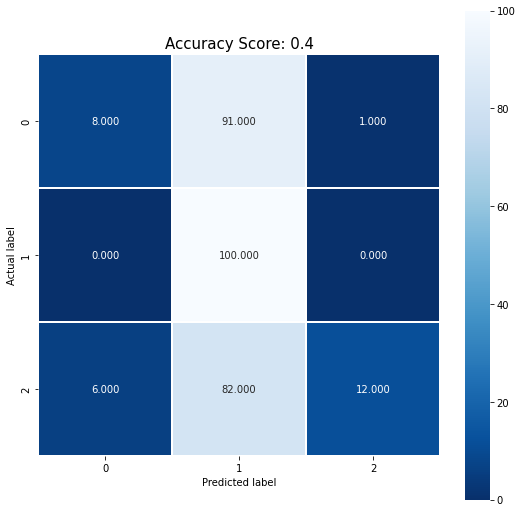

In [ ]:
# Evaluate the performance of the model with the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predict))
plt.title(all_sample_title,size=15)

##SOBEL

In [ ]:
def read_image_sobel(disease_name,test_or_train):
  path="/content/gdrive/My Drive/Colab Notebooks/chest_xray/"+test_or_train
  loc = os.listdir(path+"/"+disease_name)
  data=[]
  for i in range(1,len(loc)+1):
    img_r = cv.imread(path+"/"+disease_name+"/"+disease_name+"-"+str(i)+".jpg")
    reimg_r = cv.resize(img_r,(32,32))
    gray_img=cv.cvtColor(reimg_r,cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(gray_img, (3,3), 0) 
    result = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)
    data.append(result)
  return np.array(data)

In [ ]:
pneumonia_test_sobel=read_image_sobel("pneumonia","test")
covid_test_sobel=read_image_sobel("covid","test")
normal_test_sobel=read_image_sobel("normal","test")
pneumonia_train_sobel=read_image_sobel("pneumonia","train")
covid_train_sobel=read_image_sobel("covid","train")
normal_train_sobel=read_image_sobel("normal","train")

In [ ]:
X_train=np.concatenate((pneumonia_train_sobel,covid_train_sobel,normal_train_sobel))
X_test=np.concatenate((pneumonia_test_sobel,covid_test_sobel,normal_test_sobel))
y_train=np.concatenate((np.zeros((len(pneumonia_train_sobel),)),np.ones((len(covid_train_sobel),)),np.full((len(normal_train_sobel),),2)))
y_test=np.concatenate((np.zeros((len(pneumonia_test_sobel),)),np.ones((len(covid_test_sobel),)),np.full((len(normal_test_sobel),),2)))

In [ ]:
X_train = X_train.astype('int32')
X_test=X_test.astype("int32")

In [ ]:
all_data=[]
for a in ["L1","L2"]:
  for m in ["normal","weighted"]:
    for b in range(2,53,20):
      predict=Knn(X_train,y_train,X_test,b,a,m)
      accuracy=accuracy_score(y_test,predict)
      print(a,m,b,accuracy,end="  ")
      recall=recall_score(y_test,predict,average="weighted")
      print(recall,end="  ")
      precision=precision_score(y_test,predict,average="weighted")
      print(precision,end="  ")
      f1=f1_score(y_test,predict,average="weighted")
      print(f1)
      all_data.append([a,m,b,accuracy,recall,precision,f1])     

L1 normal 2 0.7866666666666666  0.7866666666666666  0.818301451634785  0.7717386414754835
L1 normal 22 0.8566666666666667  0.8566666666666667  0.8612921191868562  0.8546470590951585
L1 normal 42 0.8466666666666667  0.8466666666666667  0.8473246322028354  0.8451074209588141
L1 weighted 2 0.8233333333333334  0.8233333333333334  0.8317395810152628  0.8173079624142957
L1 weighted 22 0.8633333333333333  0.8633333333333333  0.8657399798391515  0.8607625811326123
L1 weighted 42 0.8533333333333334  0.8533333333333334  0.8530370460277003  0.851610514871723
L2 normal 2 0.7833333333333333  0.7833333333333333  0.8145671507373635  0.7707446754911587
L2 normal 22 0.8333333333333334  0.8333333333333334  0.8350147570301615  0.8304170937485946
L2 normal 42 0.83  0.83  0.830955448201825  0.8296367521367521
L2 weighted 2 0.8166666666666667  0.8166666666666667  0.8257142857142857  0.8102343376374941
L2 weighted 22 0.8466666666666667  0.8466666666666667  0.8483443998860474  0.8438194278091695
L2 weighted 4

In [ ]:
# Converting results to dataframe
import pandas as pd
columns_name=["DistanceMetric","KernelOfKnn","NearestNeighbourNumber","Accuracy","Recall","Precision","F1_Score"]
df=pd.DataFrame(all_data,columns=columns_name)
df.iloc[:,3:]=round(df.iloc[:,3:],2)
df

DistanceMetric KernelOfKnn  NearestNeighbourNumber  Accuracy  Recall  \
0              L1      normal                       2      0.79    0.79   
1              L1      normal                      22      0.86    0.86   
2              L1      normal                      42      0.85    0.85   
3              L1    weighted                       2      0.82    0.82   
4              L1    weighted                      22      0.86    0.86   
5              L1    weighted                      42      0.85    0.85   
6              L2      normal                       2      0.78    0.78   
7              L2      normal                      22      0.83    0.83   
8              L2      normal                      42      0.83    0.83   
9              L2    weighted                       2      0.82    0.82   
10             L2    weighted                      22      0.85    0.85   
11             L2    weighted                      42      0.84    0.84   

    Precision  F1_Score  
0        0.82      0.77  
1        0.86      0.85  
2        0.85      0.85  
3        0.83      0.82  
4        0.87      0.86  
5        0.85      0.85  
6        0.81      0.77  
7        0.84      0.83  
8        0.83      0.83  
9        0.83      0.81  
10       0.85      0.84  
11       0.84      0.84

In [ ]:
from google.colab import files
df.to_csv('sobelxy.csv', encoding = 'utf-8-sig') 
files.download('sobelxy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
error=[]
for i in range(1,100,5):
  predict=Knn(X_train,y_train,X_test,i,"L2","normal")
  rmse = np.sqrt(np.square(np.subtract(y_test,predict)).mean())
  error.append(rmse)

Text(0, 0.5, 'RMSE Rate')

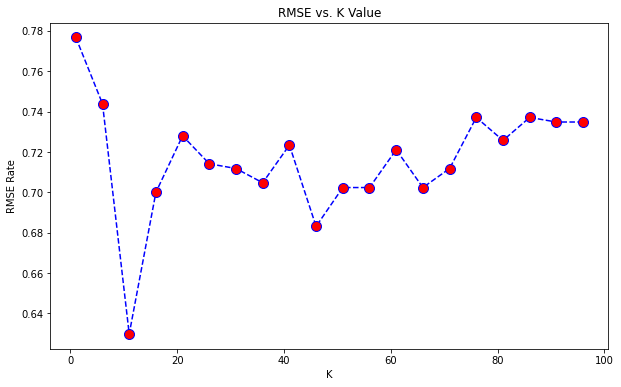

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100,5),error,color=  "blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("RMSE vs. K Value")
plt.xlabel("K")
plt.ylabel("RMSE Rate")

In [ ]:
predict=Knn(X_train,y_train,X_test,11,"L2","normal")

In [ ]:
accuracy=accuracy_score(y_test,predict)
print("accuracy = ",accuracy)
recall=recall_score(y_test,predict,average="weighted")
print("recall score = ",recall)
precision=precision_score(y_test,predict,average="weighted")
print("precision = ",precision)
f1=f1_score(y_test,predict,average="weighted")
print("f1_score = ",f1)

accuracy =  0.8633333333333333
recall score =  0.8633333333333333
precision =  0.8662944915629854
f1_score =  0.861638764789302


Text(0.5, 1.0, 'Accuracy Score: 0.8633333333333333')

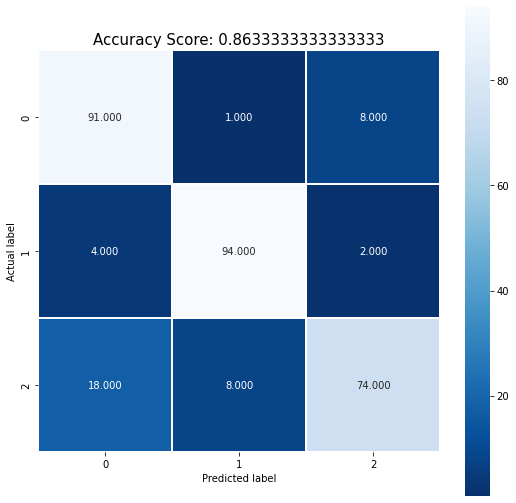

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test,predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predict))
plt.title(all_sample_title,size=15)

##GABOR

In [ ]:
# Reading the data set in the drive for gabor filter
def read_image_gabor(disease_name,test_or_train):
  def build_filters():
    filters = []
    ksize = 30
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0.8, ktype=cv.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

  def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv.filter2D(img, cv.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum
  path="/content/gdrive/My Drive/Colab Notebooks/chest_xray/"+test_or_train
  loc = os.listdir(path+"/"+disease_name)
  data=[]
  for i in range(1,len(loc)+1):
    img = cv.imread(path+"/"+disease_name+"/"+disease_name+"-"+str(i)+".jpg")
    reimg_r = cv.resize(img,(32,32))
    filters = build_filters()
    gabor_img = process(reimg_r, filters)
    result=gabor_img.ravel()
    data.append(result)
  return np.array(data)

In [ ]:
pneumonia_test_gabor=read_image_gabor("pneumonia","test")
covid_test_gabor=read_image_gabor("covid","test")
normal_test_gabor=read_image_gabor("normal","test")
pneumonia_train_gabor=read_image_gabor("pneumonia","train")
covid_train_gabor=read_image_gabor("covid","train")
normal_train_gabor=read_image_gabor("normal","train")

In [ ]:
X_train=np.concatenate((pneumonia_train_gabor,covid_train_gabor,normal_train_gabor))
X_test=np.concatenate((pneumonia_test_gabor,covid_test_gabor,normal_test_gabor))
y_train=np.concatenate((np.zeros((len(pneumonia_train_gabor),)),np.ones((len(covid_train_gabor),)),np.full((len(normal_train_gabor),),2)))
y_test=np.concatenate((np.zeros((len(pneumonia_test_gabor),)),np.ones((len(covid_test_gabor),)),np.full((len(normal_test_gabor),),2)))

In [ ]:
X_train = X_train.astype('int32')
X_test=X_test.astype("int32")

In [ ]:
from sklearn.metrics import classification_report
k=52
distance_metric="L2"
kernelofKnn="normal"
ksize=100
theta_change=1/16
predict=Knn(X_train,y_train,X_test,k,distance_metric,kernelofKnn)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix # metrics error
gabor_data=[]
accuracy=accuracy_score(y_test,predict)
recall=recall_score(y_test,predict,average="weighted")
precision=precision_score(y_test,predict,average="weighted")
f1=f1_score(y_test,predict,average="weighted")
gabor_data.append([distance_metric,kernelofKnn,k,ksize,theta_change,accuracy,recall,precision,f1])

In [ ]:
import pandas as pd
column=["DistanceMetric","KernelOfKnn","K-value","Ksize","ThetaChange","Accuracy","Recall","Precision","F1_Score"]
df=pd.DataFrame(gabor_data,columns=column)
df.iloc[:,4:]=round(df.iloc[:,4:],4)
df

In [ ]:
import pandas as pd
path = '/content/gdrive/My Drive/Colab Notebooks/gabor_ksize.csv'
exist=os.path.exists(path)
with open(path, 'a', encoding = 'utf-8-sig') as f:
  if(exist):
    df.to_csv(f,index=False,header=False)
  else:
    df.to_csv(f,index=False)

In [ ]:
predict=Knn(X_train,y_train,X_test,16,"L2","normal")

In [ ]:
accuracy=accuracy_score(y_test,predict)
print("accuracy = ",accuracy)
recall=recall_score(y_test,predict,average="weighted")
print("recall score = ",recall)
precision=precision_score(y_test,predict,average="weighted")
print("precision = ",precision)
f1=f1_score(y_test,predict,average="weighted")
print("f1_score = ",f1)

accuracy =  0.7933333333333333
recall score =  0.7933333333333333
precision =  0.7988580589468491
f1_score =  0.7890595887244378


Text(0.5, 1.0, 'Accuracy Score: 0.7933333333333333')

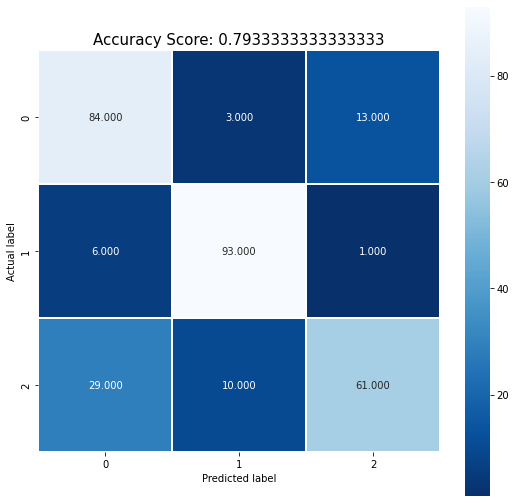

In [ ]:
cm = confusion_matrix(y_test,predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predict))
plt.title(all_sample_title,size=15)

# REPORT

In the second part of the homework, we will create a Knn model with a real dataset of chest X-Rays.Before creating the model, I used a method of filtering the raw data for the model to apply better results.I trained my model using Canny , Sobel and Gabor filters, respectively.I evaluated the model by changing the parameters of the Knn algorithm and filters, which I mentioned in more detail in the continuation of the report.

##Effect of image size for canny on knn model

                          32*32                                                    16*16

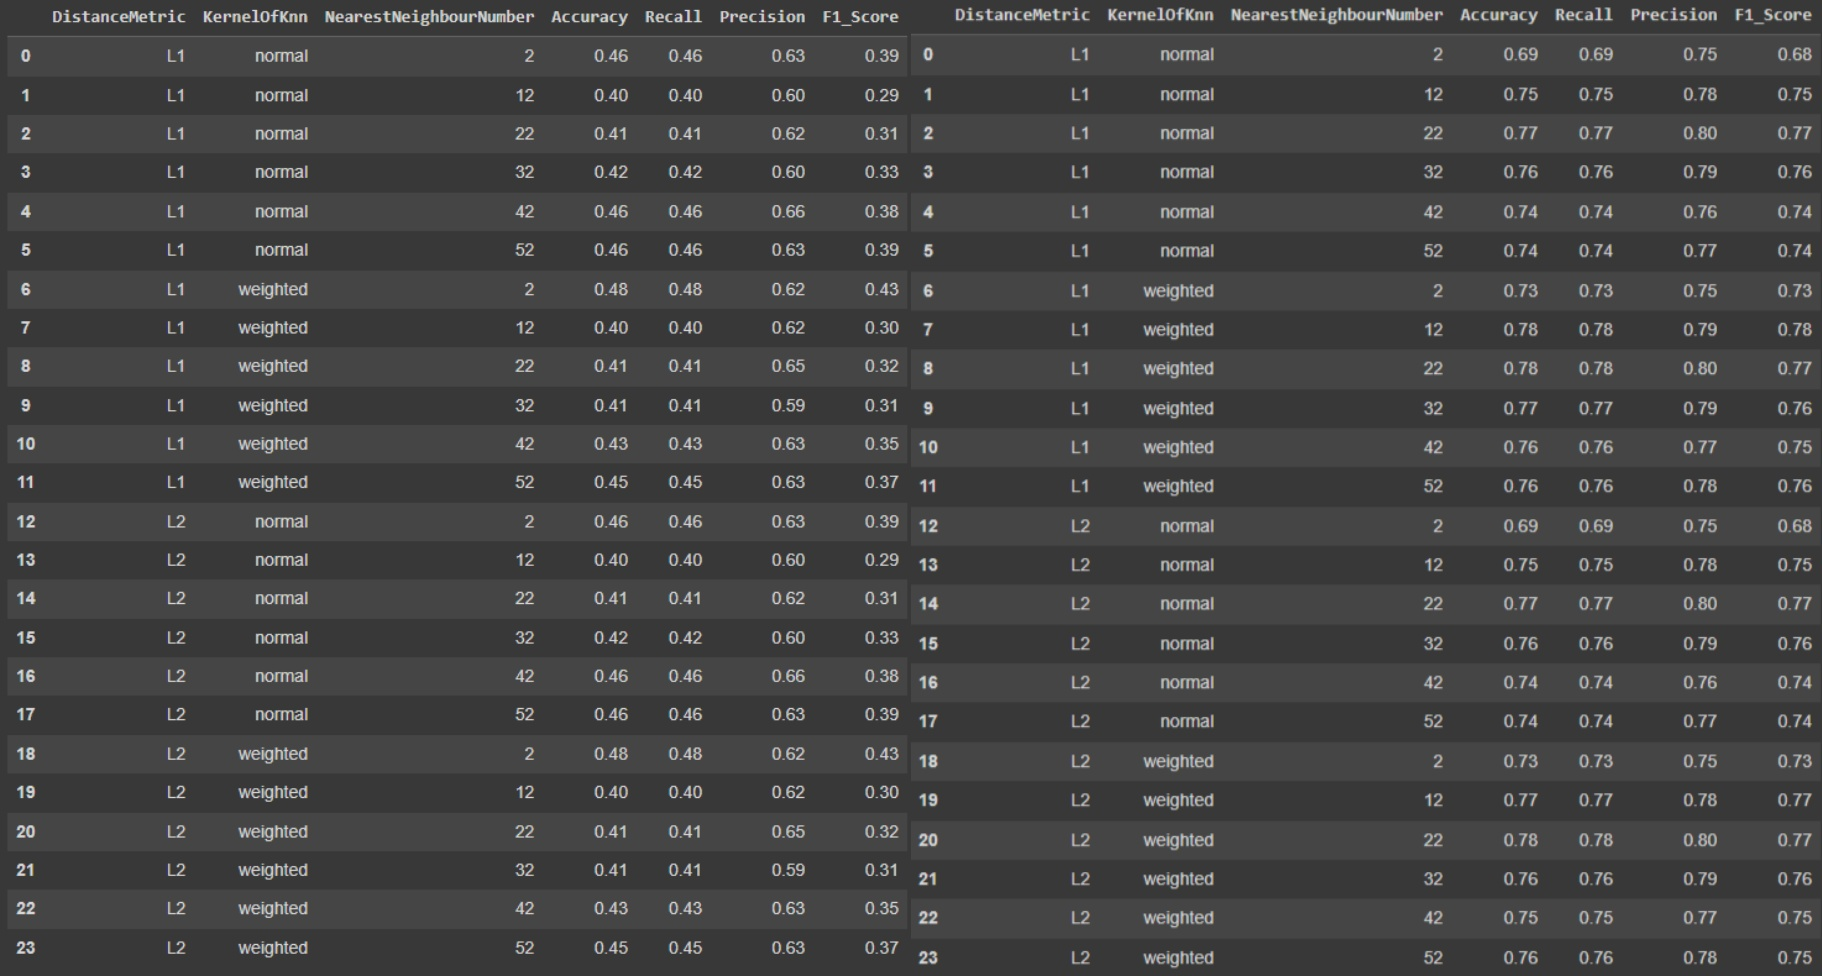

In the first part of the report, I examined the effect of image size on the model. During the examination, I used a canny filter. I saw that the model trained with 16*16 images gave better results than the model trained with 32*32 images, at every k value, distance type and kernel t in the knn model. I think the reason for this may be that there is less distance finding process in the smaller image than in the larger image.

##The effect of the threshold value of the Canny filter on the knn model


                             80-250                                               100-200
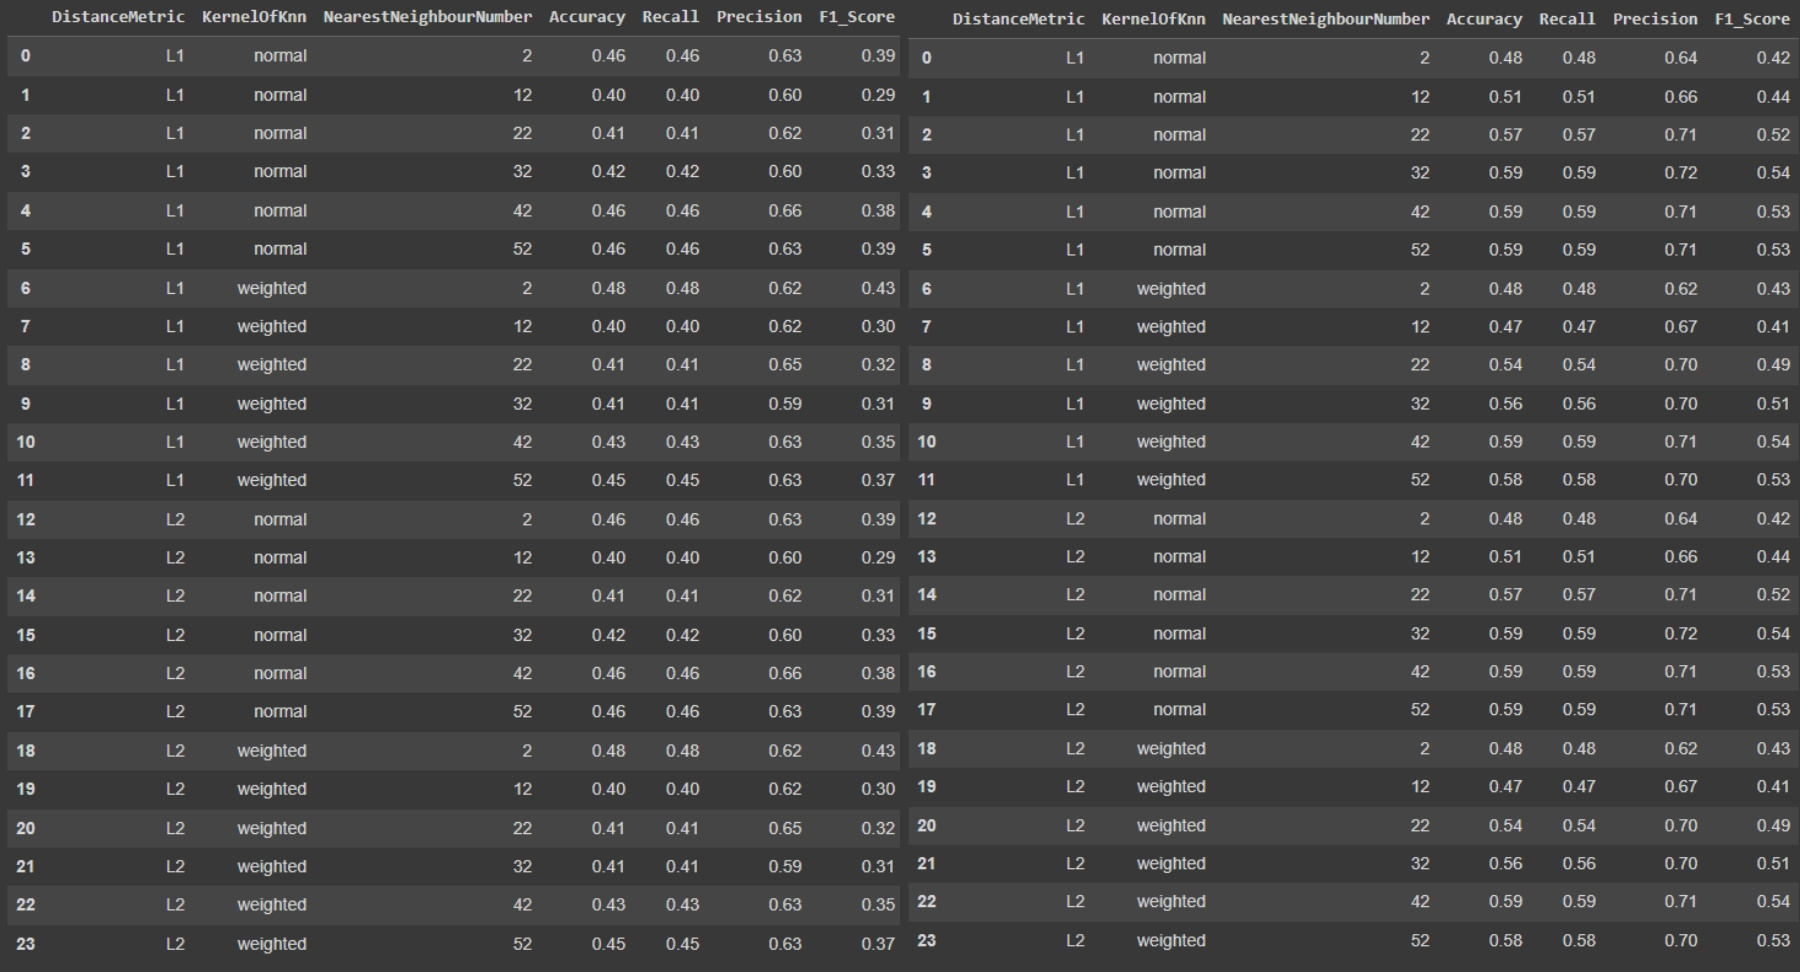

Normal Image

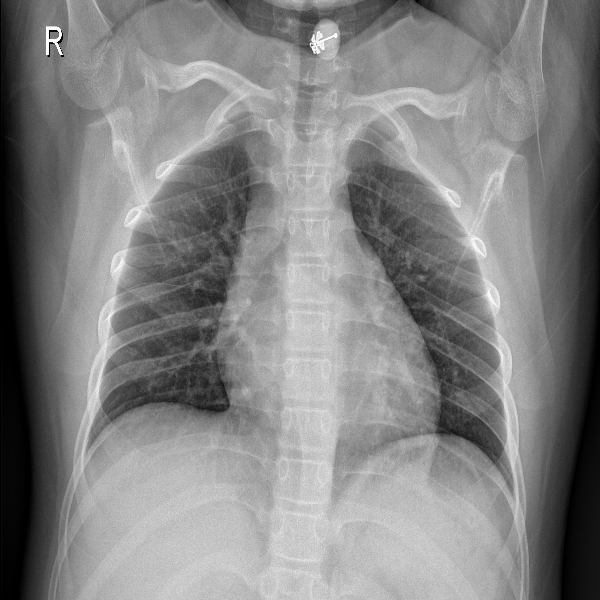

Threshold = ( 80 - 250 )

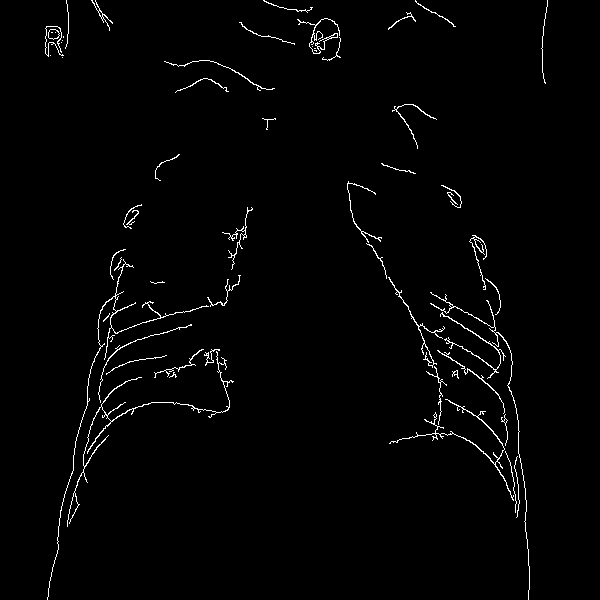

Threshold = ( 100 - 200)

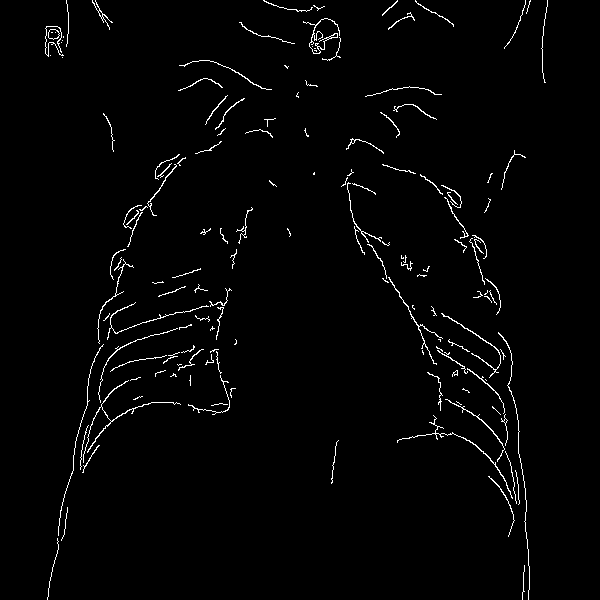

In the second part of the report, I examined the effect of changing the threshold range, which is a parameter of the Canny filter, on the trained knn model by keeping the image size constant (32*32). I determined the Threshold value range as ( 80-250 ) and ( 100 - 200 ) respectively. According to the data set I used, the (100-200) value range gave slightly better results than the (80-250) value range. This is because, as can be seen from the pictures, the image in the value range (100 - 200) showed the details in the data more clearly.

##The effect of the k-size value of the Gabor filter on the knn model

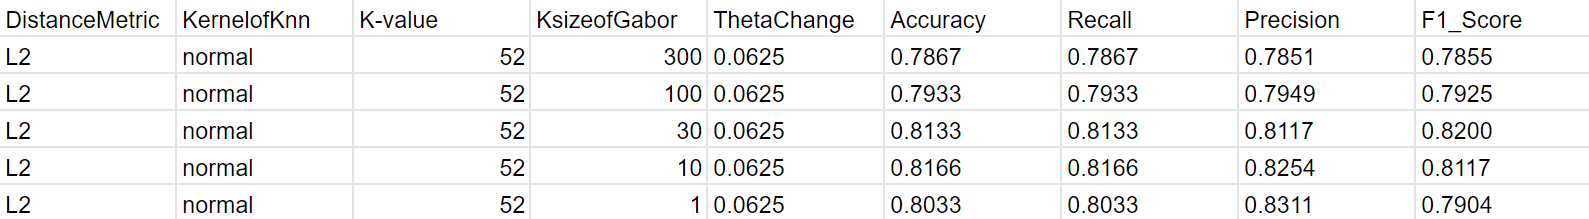

In the third part of the report, I used the gabor filter for the images and evaluated the effect of changing the ksize, kernel size, parameter of the gabor filter, on the knn model. I got the most efficient result in kernel size 32. It took too long to apply the gabor filter for kernel size 300 because we increased the size of the filter with kernel size.

##The effect of the theta_changes of the Gabor filter on the knn model

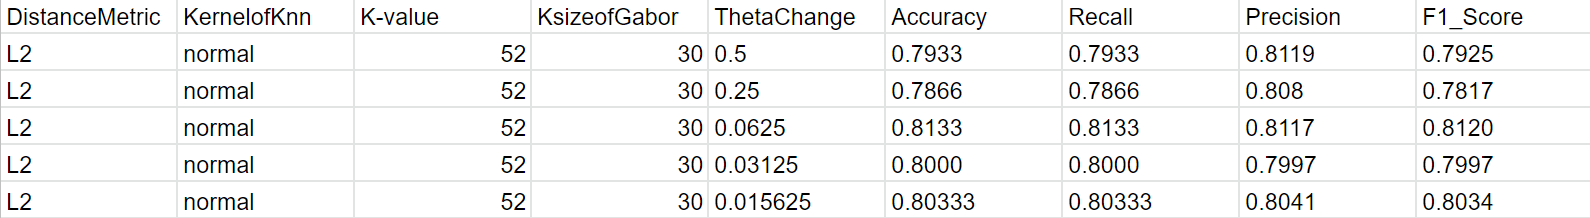

In the fourth part of the report, I evaluated the effect of the change value of the theta value change, which we used while creating the gabor filter, on the knn model.I got the best value at 0.0625. As can be seen in the table, examining the theta change was not very effective in measuring the success of the knn model.

##Sobel

For horizontal derivative (x=1,y=0)


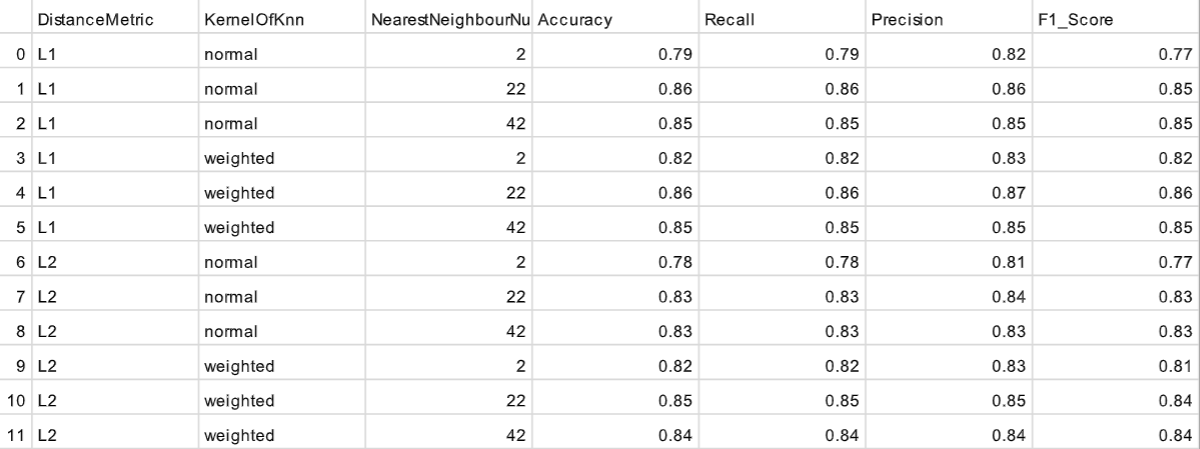

For vertical derivative (x=0,y=1)

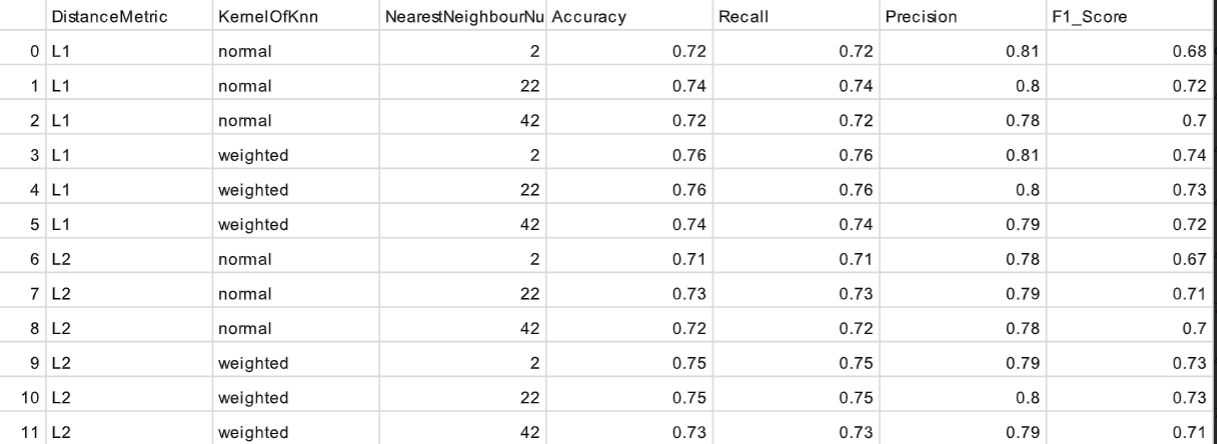

Both derivatives (x=1,y=1)

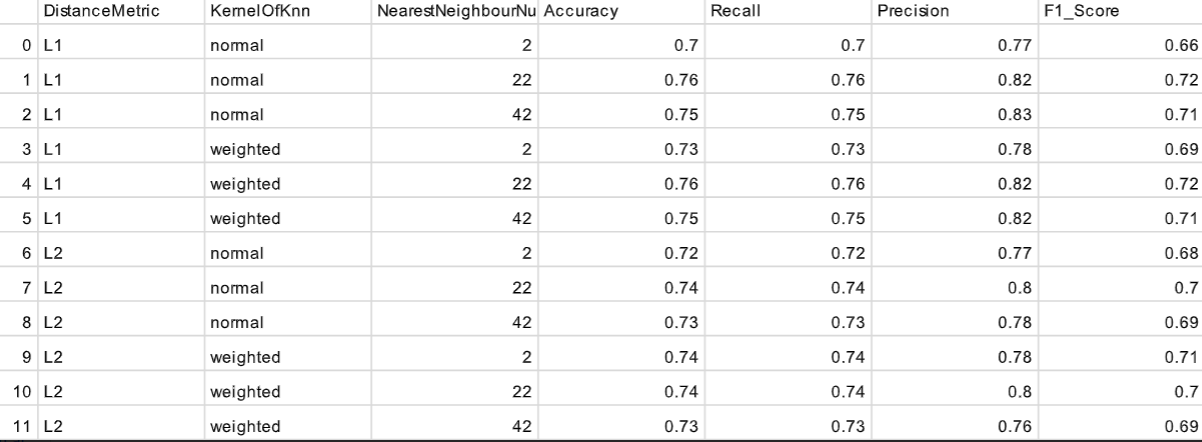

In the last part of the report, I used Sobel edge detection.The Sobel filter is used for edge detection. It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.Use this computation:



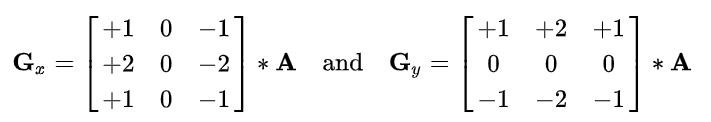

##In addition

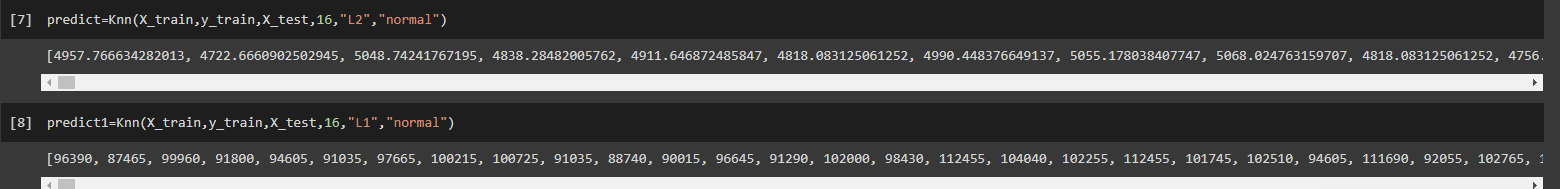

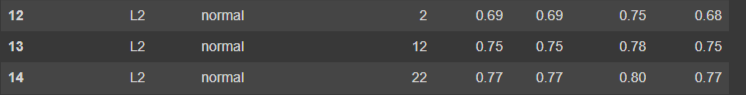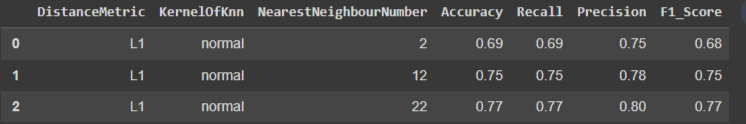

I used two different scales, "manhattan" and "euclidean", to find distance in the Knn model. As seen in the photo above, even if the lengths are calculated differently, the results such as accuracy and recall scores, which we measure the success of the knn model, give the same result for both. When I realized this, when I used both scales ,"manhattan and euclidean" using the knn algorithm in pyhton library, the results came in the same. I think it is because the data we use is well prepared.

#References
https://visualstudiomagazine.com/articles/2019/04/01/weighted-k-nn-classification.aspx

https://pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

https://en.wikipedia.org/wiki/Sobel_operator